# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [232]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [233]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [234]:
df.drop("Email No.",axis=1,inplace=True)
# since Email No. uniquely identify columns , which the row index also does , and it has no relation with email being spam or not (it may cause overfitting issues if used as a feature) , lets drop it only

In [235]:
df.info(memory_usage="deep")
# this method tells us the details about the data , memory usage deep is used to obtain a more accurate memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [236]:
df.describe()
# this show us some more insights about the data , about frequency and occurence of each word in an email message

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [237]:
df.groupby("Prediction").sum()
# in this data exploration technique , the data is grouped by Prediction to see the pattern of words(their frequency of occurence) which are common is spam email but not in non-spam emails

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,24506,21486,22885,9671,11508,6763,181711,7738,9532,31953,...,27,26,61,12,274,7,3,13,2475,27
1,9839,10519,3719,6236,4653,6824,105425,5019,938,22871,...,2,0,4,43,233,15,31,8,2256,9


In [238]:
df.columns.to_list()

# this analysis reveals that the datset has many columns which are just english letters that have no meaning , like e , l ,m etc , so we need to drop them as columns as they have no meaning , only I and A are one letter english words that makes sense, also two letters words make no sense even a and i does not help in detecting spam so drop them all
 

['the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'as',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'has',
 'was',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xls',
 'farmer',
 'attached',
 'us',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'questions',
 'www',
 'deals',
 'volumes',
 'pm',
 'ena',
 'now',
 'their',
 'file',
 's

In [239]:
df.shape

(5172, 3001)

In [240]:
columns_to_drop = []

for col in df.columns:
    if(len(col)<=2):
        columns_to_drop.append(col)

print(columns_to_drop)      
# as we can see many two letter words are meaningless and other words cannot be used as features so drop them 

['to', 'of', 'a', 'in', 'on', 'is', 'i', 'be', 'at', 'we', 's', 'it', 'by', 'as', 'or', 'me', 'if', 're', 'e', 'd', 'an', 't', 'up', 'j', 'do', 'am', 'no', 'l', 'so', 'm', 'us', 'my', 'th', 'pm', 'b', 'p', 'o', 'c', 'he', 'r', 'fw', 'go', 'w', 'x', 'k', 'f', 'h', 'll', 'co', 'u', 'iv', 'n', 'tu', 'na', 've', 'g', 'id', 'pg', 'v', 'nd', 'st', 'xp', 'tx', 'pt', 'y', 'cd', 'im', 'ic', 'de', 'mg', 'lp', 'rd', 'el', 'cs', 'oo', 'mm', 'dy', 'mx', 'pc', 'cp', 'mr', 'ua', 'cc', 'al', 'rc', 'wi', 'la', 'ok', 'vs', 'cf', 'ei', 'ed', 'gd', 'ex', 'br', 'sa', 'oi', 'gb', 'ca', 'jo', 'td', 'hl', 'ms', 'dr', 'rx', 'hi', 'z', 'q', 'jr', 'mb', 'gr', 'en', 'hr', 'rm', 'ga', 'se', 'eb', 'tv', 'mo', 'tr', 'ce', 'da', 'ad', 'ti', 'wc', 'ft', 'pi', 'sr', 'rr', 'hp', 'xl', 'dl', 'em', 'pa', 'ls', 'ii', 'et', 'un', 'ya', 'ma', 'ac', 'ct', 'fl', 'ut', 'mi', 'po', 'sp', 'ea', 'le', 'ur', 'ml', 'tm', 'ff']


In [241]:
df.drop(columns=columns_to_drop,inplace=True)

## Looking at the data

<BarContainer object of 5 artists>

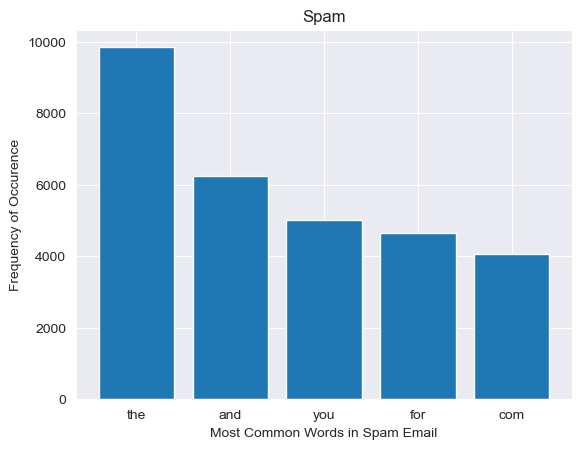

In [242]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam_emails  = df[df.Prediction==1].sum().sort_values(ascending=False).head(5)

sns.set_style(style="darkgrid")
plt.title("Spam")
plt.xlabel("Most Common Words in Spam Email")
plt.ylabel("Frequency of Occurence")
plt.bar(spam_emails.index, spam_emails.values)

# since it is categorical data , so bar plot makes more sense rather than hostogram


<BarContainer object of 5 artists>

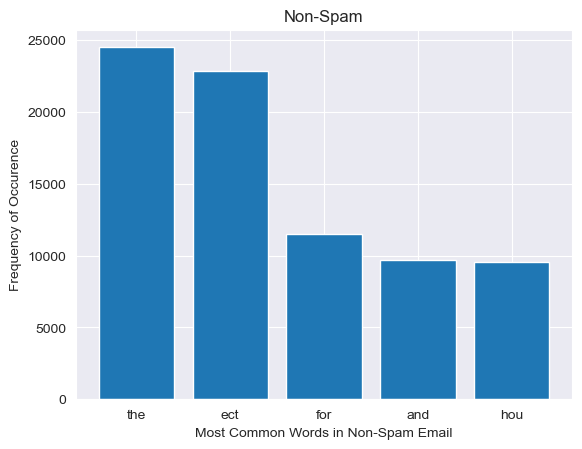

In [243]:
non_spam_emails  = df[df.Prediction==0].sum().sort_values(ascending=False).head(5)

sns.set_style(style="darkgrid")
plt.title("Non-Spam")
plt.xlabel("Most Common Words in Non-Spam Email")
plt.ylabel("Frequency of Occurence")
plt.bar(non_spam_emails.index, non_spam_emails.values)

## Figuring out some comparatively more important features

In [244]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 

df.shape

# one way to eliminate columns is to take difference of occurence of words in spam and non spam emails , i.e if some word is occuring 4000 times in spam and 4010 in non spam then it won't be a best way to diffentiate between spam and non spam , as insignificant difference

# this kind of word are common words and are not specific to spam or non spam only so eliminate these

(5172, 2848)

In [245]:
# since number of columns is 2.5k so lets eliminate 1000 columns with least difference in values
grouped_data = pd.DataFrame(df.groupby("Prediction").sum())
grouped_data.head()

diff= grouped_data.loc[0,:]-grouped_data.loc[1,:]
diff = diff.abs()
# we need absolute values of difference
diff



the               14667
ect               19166
and                3435
for                6855
you                2719
                  ...  
lay                  41
infrastructure        8
military             28
allowing              5
dry                  18
Length: 2847, dtype: int64

In [246]:
columns_to_drop = diff.nsmallest(1300).index
columns_to_drop

# these are the columns which make the least difference


Index(['personal', 'aware', 'black', 'outstanding', 'multiple', 'comes',
       'built', 'quantities', 'makes', 'completely',
       ...
       'transco', 'briley', 'apple', 'sheri', 'locker', 'nick', 'zajac',
       'exploration', 'image', 'assets'],
      dtype='object', length=1300)

In [247]:
df.drop(columns=columns_to_drop,inplace=True)

<BarContainer object of 5 artists>

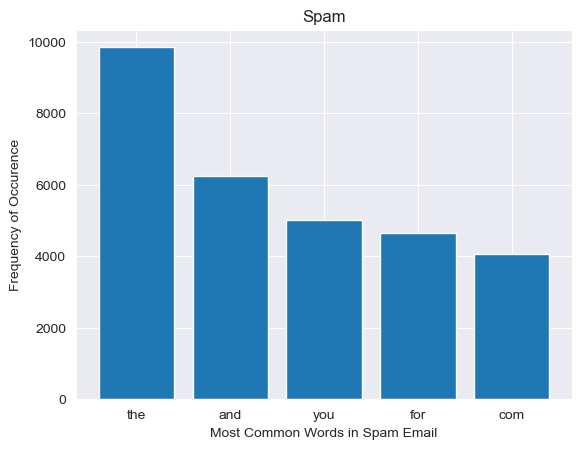

In [248]:
spam_emails  = df[df.Prediction==1].sum().sort_values(ascending=False).head(5)

sns.set_style(style="darkgrid")
plt.title("Spam")
plt.xlabel("Most Common Words in Spam Email")
plt.ylabel("Frequency of Occurence")
plt.bar(spam_emails.index, spam_emails.values)

<BarContainer object of 5 artists>

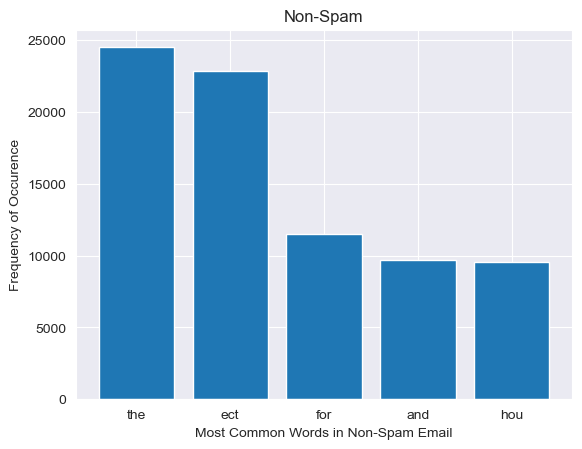

In [249]:
non_spam_emails  = df[df.Prediction==0].sum().sort_values(ascending=False).head(5)

sns.set_style(style="darkgrid")
plt.title("Non-Spam")
plt.xlabel("Most Common Words in Non-Spam Email")
plt.ylabel("Frequency of Occurence")
plt.bar(non_spam_emails.index, non_spam_emails.values)

In [250]:
df.shape

(5172, 1548)

## Train - Test Split

In [251]:
# Create trianing and testing data

from sklearn.model_selection import train_test_split

X = df.drop(columns=["Prediction"])
y = df.Prediction

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=23)


## Making Predictions using Multinomial NB Classifier

In [252]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [253]:
model.score(X_test,y_test)
# hence the model have almist 93% accuracy on testing subset of the data

0.9349736379613357

In [254]:
from sklearn.model_selection import cross_val_score

multiNB = MultinomialNB()

cross_val_score(multiNB,X,y,cv=5).mean()
# this is also a measure of models performance where it divides data into multiple subsets to enchance accuracy

0.9400590549341705

In [255]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
from sklearn.metrics import roc_auc_score,roc_curve

In [256]:
#calculating values of probablity by which model predicts the value in this binary classification
y_pred_prob = model.predict_proba(X_test)

In [257]:
score = roc_auc_score(y_test,y_pred_prob[:,1])
# this score is are under the curve or AUC, more the AUC better the model

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

In [258]:
x_random = np.linspace(0,1,100)
y_random = x_random

# this is used to plot ROC-AUC curve for a random classifier that is a classifier which is purely random and considers no pattern or info from data
# this is plotted for refrence , curves above it are more accurate

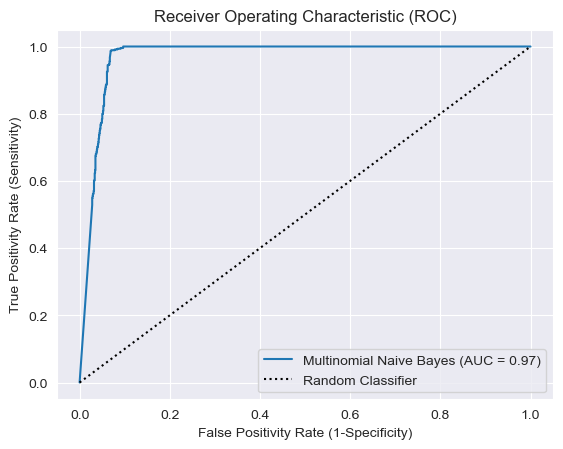

In [259]:
plt.plot(fpr, tpr, label='Multinomial Naive Bayes (AUC = {:.2f})'.format(score))
plt.plot(x_random,y_random, label='Random Classifier',color="black",linestyle="dotted")
plt.xlabel('False Positivity Rate (1-Specificity)')
plt.ylabel('True Positivity Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Plot the confusion Matrix

In [260]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix

X_sample = df.drop("Prediction",axis=1).sample(5,random_state=87)
y_sample = df.sample(5,random_state=87).Prediction

# randomly 5 rows are chosen

In [261]:
y_pred = model.predict(X_sample)
print(confusion_matrix(y_sample,y_pred))

# True Positive       False Positive
# False Negative      True Negative



[[4 0]
 [0 1]]


In [262]:
# now for entire data
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)

Text(52.722222222222214, 0.5, 'Actual')

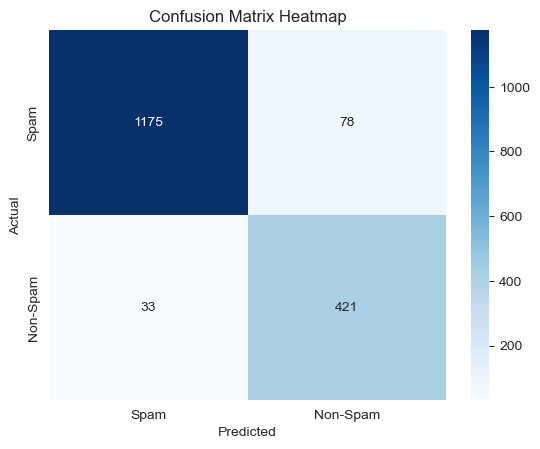

In [263]:
labels = ["Spam","Non-Spam"]
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# more elements in confusion matrix on diagonals the better the model

## Trying out with SVMs

In [264]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

from sklearn.svm import SVC

model2 = SVC(probability=True)
model2.fit(X_train,y_train)


SVC(probability=True)

In [265]:
model2.score(X_test,y_test)

0.9548916227299356

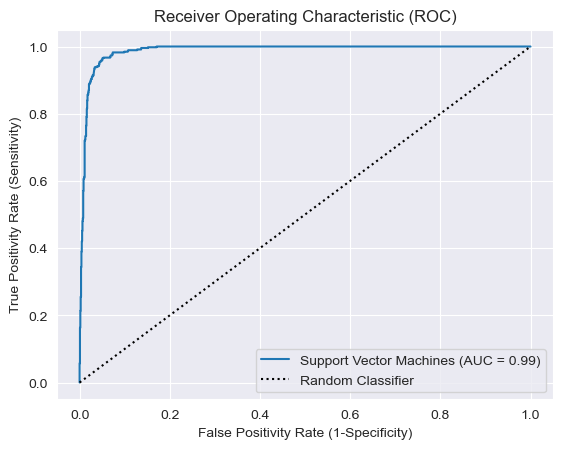

In [266]:
from sklearn.metrics import roc_auc_score,roc_curve

y_pred_prob2 = model2.predict_proba(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2[:, 1])

score2 = roc_auc_score(y_test,y_pred_prob2[:,1])


plt.plot(fpr2, tpr2, label='Support Vector Machines (AUC = {:.2f})'.format(score2))
plt.plot(x_random,y_random, label='Random Classifier',color="black",linestyle="dotted")
plt.xlabel('False Positivity Rate (1-Specificity)')
plt.ylabel('True Positivity Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [267]:
y_pred2 = model2.predict(X_test)
matrix2 = confusion_matrix(y_test,y_pred2)

Text(52.722222222222214, 0.5, 'Actual')

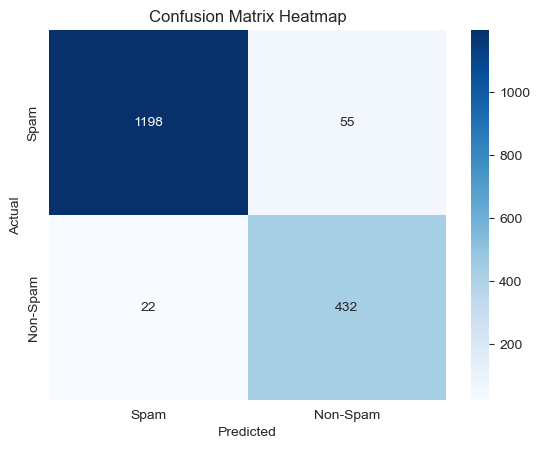

In [268]:
labels = ["Spam","Non-Spam"]
sns.heatmap(matrix2, annot=True, fmt='d', cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')


## Comparing the models

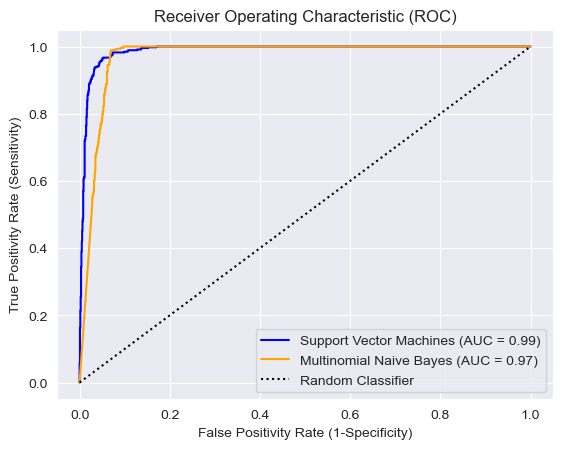

In [269]:
# Which model performed better?
plt.plot(fpr2, tpr2, label='Support Vector Machines (AUC = {:.2f})'.format(score2),color="blue")
plt.plot(fpr, tpr, label='Multinomial Naive Bayes (AUC = {:.2f})'.format(score),color="orange")
plt.plot(x_random,y_random, label='Random Classifier',color="black",linestyle="dotted")
plt.xlabel('False Positivity Rate (1-Specificity)')
plt.ylabel('True Positivity Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# so its clearly visible from AUC-ROC that SVM performed better than multinomial naive bayes classifier 



In [270]:
# Can you suggest some reason for better performance of one model over the other?

# SVM performed slightly better than mutinomial naive bayes because unlike naive bayes it does not treat features independent but try to find a pattern between then which in this case of spam classifcation is crucial

## Bonus Question

In [271]:
from sklearn.feature_extraction.text import CountVectorizer

# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
s = "I am a Python developer and currently working on a project to classify mails and some of the mails are amazing"

vectorizer = CountVectorizer()

freq = vectorizer.fit_transform([s])
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(freq.toarray(),columns=feature_names)
df.head()
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

,am,amazing,and,are,classify,currently,developer,mails,of,on,project,python,some,the,to,working
0,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1
